In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, execute
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel
from qiskit.providers.aer import AerSimulator

### here is simlated stuff

In [3]:
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

# Set up the noisy simulator
simulator = AerSimulator(noise_model=noise_model)

# Initialize a Quantum Circuit with 2 qubits
circuit = QuantumCircuit(2, 2)  # Added 2 classical bits for measurement

# Apply gates to create a superposition and make the state more interesting
circuit.h(0)
circuit.h(1)
circuit.u(np.pi/4, -np.pi/3, np.pi/8, 0)
circuit.u(np.pi/5, np.pi/4, -np.pi/7, 1)

# Measure the qubits
circuit.measure([0, 1], [0, 1])

# Execute the circuit with the noisy simulator
result = execute(circuit, simulator, shots=1024).result()

counts = result.get_counts()

print("Counts: ", counts)

total_counts = sum(counts.values())

p_00 = counts['00'] / total_counts
p_01 = counts['01'] / total_counts
p_10 = counts['10'] / total_counts
p_11 = counts['11'] / total_counts

# Map the probabilities to the real and imaginary parts of the complex number
real_part = abs(p_00 - p_11)
imag_part = abs(p_01 - p_10)*4

z = real_part + imag_part * 1j
print(z)


Counts:  {'01': 165, '00': 90, '10': 276, '11': 493}
(0.3935546875+0.43359375j)


### reall quantium

In [ ]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy

provider = IBMProvider()

# Find the least busy backend with at least 2 qubits
ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))

print("The least busy quantum computer now is", ibmq_backend)

# Initialize a Quantum Circuit with 2 qubits
circuit = QuantumCircuit(2, 2)  # Added 2 classical bits for measurement

# Apply gates to create a superposition and make the state more interesting
circuit.h(0)
circuit.h(1)
circuit.u(np.pi/4, -np.pi/3, np.pi/8, 0)
circuit.u(np.pi/5, np.pi/4, -np.pi/7, 1)

# Measure the qubits
circuit.measure([0, 1], [0, 1])

# Number of shots to run the program (experiment); maximum is 8192 shots.
shots = 1024

# Execute the circuit on the least busy backend. Monitor the execution of the job in the queue
job_ibmq = execute(circuit, ibmq_backend, shots=shots)
result = job_ibmq.result()

counts = result.get_counts()

print("Counts: ", counts)

total_counts = sum(counts.values())

p_00 = counts.get('00', 0) / total_counts
p_01 = counts.get('01', 0) / total_counts
p_10 = counts.get('10', 0) / total_counts
p_11 = counts.get('11', 0) / total_counts

# Map the probabilities to the real and imaginary parts of the complex number
real_part = abs(p_00 - p_11)
imag_part = abs(p_01 - p_10)*4 

z = real_part + imag_part * 1j
print(z)

The least busy quantum computer now is <IBMBackend('ibm_brisbane')>


## after using real or simulated use this to get the fractal

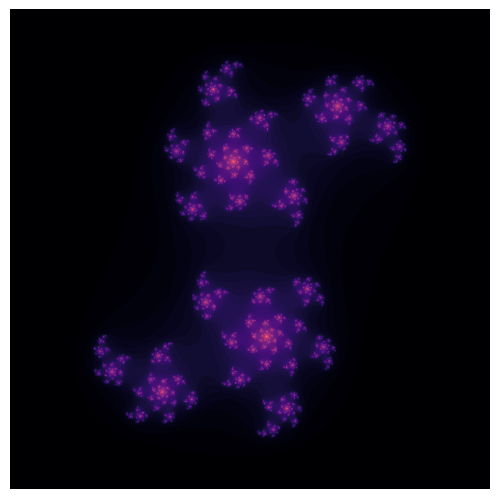

In [4]:
def create_fractal(constant, height=1000, width=1000, x_center=0, y_center =0, zoom=1, max_iterations=100):
    x_range, y_range = 1.5, 1.5 * height / width
    x = np.linspace(x_center - x_range / zoom, x_center + x_range / zoom, width).reshape((1, width))
    y = np.linspace(y_center - y_range / zoom, y_center + y_range / zoom, height).reshape((height, 1))
    z, c = x + 1j * y, np.full((height, width), constant)
    divergence_time = np.zeros_like(c, dtype=int)
    mask = np.ones_like(c, dtype=bool)
    
    for i in range(max_iterations):
        z[mask] = z[mask] ** 2 + c[mask]
        mask[np.abs(z) > 2] = False
        divergence_time[mask] = i
    return divergence_time


# plot the Julia set fractal
plt.imshow(create_fractal(z), cmap='magma') # viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.axis('off')
plt.margins(0,0)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig("test.png",bbox_inches='tight')
plt.show()
